# Keras

Keras — открытая нейросетевая библиотека, написанная на языке Python. Она представляет собой надстройку над фреймворками Deeplearning4j, TensorFlow и Theano.[1][2] Нацелена на оперативную работу с сетями глубинного обучения, при этом спроектирована так, чтобы быть компактной, модульной и расширяемой. Она была создана как часть исследовательских усилий проекта ONEIROS (англ. Open-ended Neuro-Electronic Intelligent Robot Operating System),[3] а ее основным автором и поддерживающим является Франсуа Шолле (фр. François Chollet), инженер Google.

Планировалось что Google будет поддерживать Keras в основной библиотеке TensorFlow, однако Шолле выделил Keras в отдельную надстройку, так как согласно концепции Keras является скорее интерфейсом, чем сквозной системой машинного обучения. Keras предоставляет высокоуровневый, более интуитивный набор абстракций, который делает простым формирования нейронных сетей не зависимо от используемой на нижнем уровне библиотеки научных вычислений.[4] Microsoft работает над добавлением к Keras и нижнеуровневых библиотек CNTK[en].[5]

https://ru.wikipedia.org/wiki/Keras

In [5]:
from keras.layers import Dense
from keras.models import Sequential
import keras
import os

/home/student/develop/ml/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

## MNIST 
Загрузим MNIST

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

Тестовые и тренировачные данные

In [7]:
X_train, y_train,X_test,  y_test = X[:60000], y[:60000], X[60000:], y[60000:]
X_train = X_train / 255.
X_test = X_test / 255.


img_rows, img_cols = 28, 28

X_train2D = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test2D = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


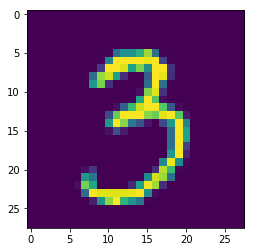

In [31]:
plt.imshow(X_train2D[20000,:,:,0])

кодируем метки (label) в K-мерный массив, необходимый шаг для тренировки, когда результатом является метка. Для данных MNIST метка - число от 0 до 9 - цифра, изображенная на изображении

In [8]:
num_classes = 10
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)


## Dense neural network DNN
Строим нейронную сеть

In [9]:
model = Sequential()

model.add(Dense(units=300, activation='relu', input_dim=784))

model.add(Dense(units=100, activation='relu', input_dim=300))
model.add(Dense(units=32, activation='relu', input_dim=100))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Тренируем

In [12]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.7860 - acc: 0.8464
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 2.1566 - acc: 0.8251
Epoch 3/10
60000/60000 [==============================] - 12s 203us/step - loss: 4.0282 - acc: 0.7376
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 7.2967 - acc: 0.5442
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 9.4957 - acc: 0.4096
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 9.6232 - acc: 0.4021
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 9.1808 - acc: 0.4297
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 9.1386 - acc: 0.4325
Epoch 9/10
60000/60000 [==============================] - 11s 179us/step - loss: 9.0971 - acc: 0.4350
Epoch 10/10
60000/60000 [==============================] - 11s 184us/step - loss: 9

Если долго ждать, можно загрузить из файла (сначала в верхнем меню выберите Kernel/Interupt)

In [13]:
from keras.models import load_model
model = load_model(os.path.expanduser('~/model/keras_mnist_dnn.h5'))

Проверяем

In [14]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=128)
loss_and_metrics

10000/10000 [==============================] - 0s 30us/step


[0.4350170964811696, 0.9484]

Сохраняем

In [15]:
model.save(os.path.expanduser('~/model/keras_mnist_dnn.h5'))

## Convolutional neural network CNN


Строим сеть


In [16]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
input_shape = (img_rows, img_cols, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



 и тренируем её

In [17]:
model.fit(X_train2D, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          )

Epoch 1/12
 1792/60000 [..............................] - ETA: 3:30 - loss: 4.2006 - acc: 0.2081

KeyboardInterrupt: 

Если долго ждать, можно загрузить уже натренированную

In [18]:
from keras.models import load_model
model = load_model(os.path.expanduser('~/model/keras_mnist_cnn.h5'))

Проверяем

In [19]:
loss_and_metrics = model.evaluate(X_test2D, Y_test, batch_size=128)
loss_and_metrics[1]

10000/10000 [==============================] - 8s 849us/step


0.9904

Сохраняем

In [9]:
model.save(os.path.expanduser('~/model/keras_mnist_cnn.h5'))

## Cifar10

In [35]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']




'автомобиль'

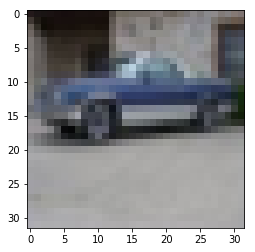

In [39]:
import numpy as np
idx = 10000
plt.imshow(x_train[idx,:,:])
classes[np.argmax(y_train[idx])]

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [24]:

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



Тренировка займет некторое время

In [ ]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 222s 4ms/step - loss: 1.8477 - acc: 0.3250 - val_loss: 1.5564 - val_acc: 0.4421
Epoch 2/100
50000/50000 [==============================] - 215s 4ms/step - loss: 1.5178 - acc: 0.4503 - val_loss: 1.3653 - val_acc: 0.5206
Epoch 3/100
50000/50000 [==============================] - 210s 4ms/step - loss: 1.3755 - acc: 0.5046 - val_loss: 1.2502 - val_acc: 0.5531
Epoch 4/100
13184/50000 [======>.......................] - ETA: 2:25 - loss: 1.2811 - acc: 0.5470

In [21]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
loss_and_metrics[1]

NameError: name 'x_test' is not defined

In [20]:
model.save(os.path.expanduser('~/model/keras_cifar10.h5'))


# Задание

Создать нейронную сеть, которая бы позволяла предсказать стоимость дома на основе датасета california_housing

In [25]:
from sklearn.datasets import california_housing
data = california_housing.fetch_california_housing()
X, y = data['data'], data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((15480, 8), (5160, 8), (15480,), (5160,))

Подсказка:
Эта задача на регрессию. Для того, чтобы определить нейронную сеть, которая бы решала эту проблему, последний слой должен быть с линейной активаторной функцией. 

    model.add(Dense(1, activation='linear'))